In [2]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re

sns.set_style("whitegrid")

In [10]:
df = pd.read_csv("Tweets.csv")

In [11]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [13]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [15]:
import re

In [16]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

    df["clean_text"] = df["text"].apply(clean_text)

In [17]:
df["clean_text"] = df["text"].apply(clean_text)

In [18]:
df[["text", "clean_text"]].head()

,text,clean_text
0,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said
1,@VirginAmerica plus you've added commercials t...,virginamerica plus youve added commercials to ...
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didnt today must mean i need t...
3,@VirginAmerica it's really aggressive to blast...,virginamerica its really aggressive to blast o...
4,@VirginAmerica and it's a really big bad thing...,virginamerica and its a really big bad thing a...


In [19]:
df["polarity"] = df["clean_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [20]:
df[["clean_text", "polarity"]].head()

,clean_text,polarity
0,virginamerica what dhepburn said,0.00000
1,virginamerica plus youve added commercials to ...,0.00000
2,virginamerica i didnt today must mean i need t...,-0.31250
3,virginamerica its really aggressive to blast o...,0.00625
4,virginamerica and its a really big bad thing a...,-0.35000


In [21]:
def get_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df["predicted_Sentiment"] = df["polarity"].apply(get_sentiment)

In [22]:
df[["polarity", "predicted_Sentiment"]].head()

,polarity,predicted_Sentiment
0,0.00000,Neutral
1,0.00000,Neutral
2,-0.31250,Negative
3,0.00625,Positive
4,-0.35000,Negative


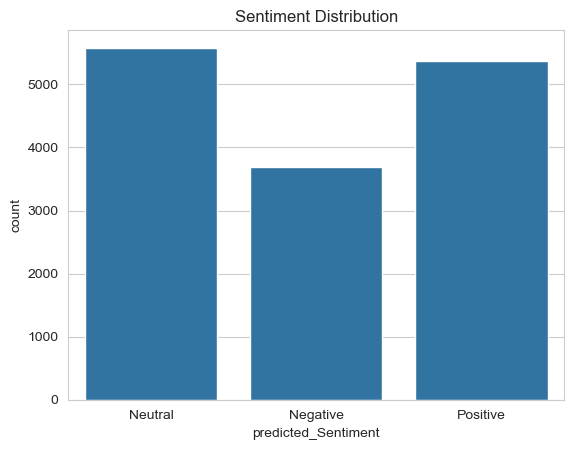

In [23]:
sns.countplot(x="predicted_Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

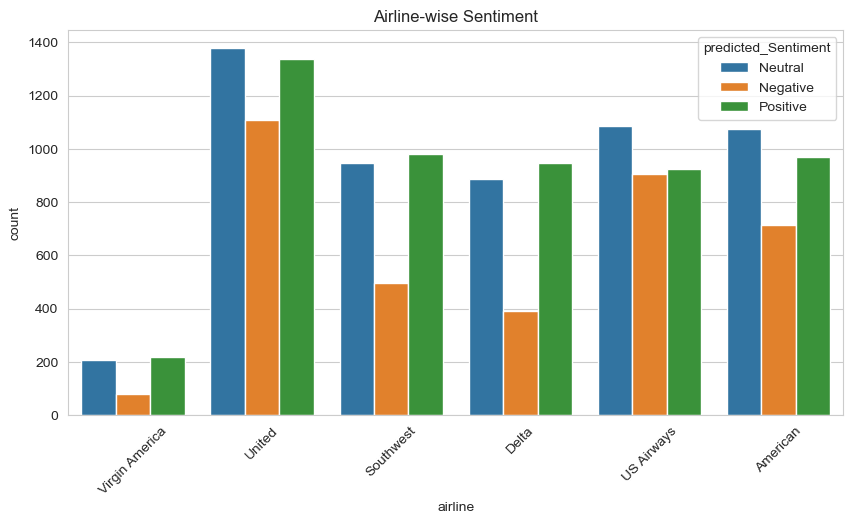

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x="airline", hue="predicted_Sentiment", data = df)
plt.xticks(rotation=45)
plt.title("Airline-wise Sentiment")
plt.show()

In [ ]:
- Visualized airline-wise sentiment distribution to compare customer opinions (positive, negative, neutral) 
across diffrent airlines.

In [26]:
sentiment_percent = df["predicted_Sentiment"].value_counts(normalize=True) * 100
print(sentiment_percent)

predicted_Sentiment
Neutral     38.087432
Positive    36.693989
Negative    25.218579
Name: proportion, dtype: float64


In [ ]:
- Calculated the percentage distribution of each sentiment category to understand overall public opinion trends.
- the highest sentiment category is a Neutral.

In [30]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
positive_text = " ".join(
    df[df["predicted_Sentiment"]=="Positive"]["clean_text"]
)

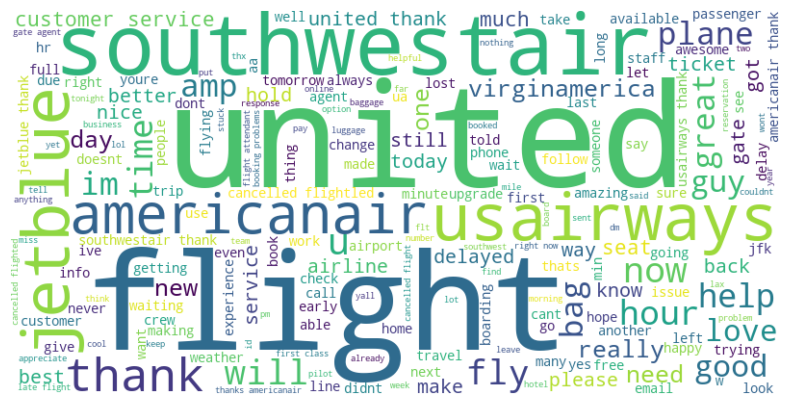

In [35]:
wc = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
- Generated a WordCloud to Visualize the most frequent words used in positive tweets, helping identify common themes in
positive customer feedback.